In [63]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

%matplotlib inline

# Percobaan 1

In [64]:
Rm = pd.read_csv('Percobaan 1.txt','\t')

u0 = 4*math.pi*(10**-7)
n = 320
r = 6.8
I = [0.242, 0.309, 0.341, 0.375]

def mag_field(I):
    return u0*((4/5)**(3/2))*(n*I)/r

Rm['B (mT)']=Rm.apply(lambda row : mag_field(row['I (A)']*100000), axis = 1)
print(Rm)


   V (MHz)  I (A)    B (mT)
0     30.6  0.242  1.024003
1     34.5  0.309  1.307508
2     39.8  0.341  1.442913
3     45.0  0.375  1.586782


Persamaan:
y = 25.32136337640074 x + 3.5367363364922966
Kesalahan: 
delta m =  4.697436993468474 
delta c =  6.371062989503467


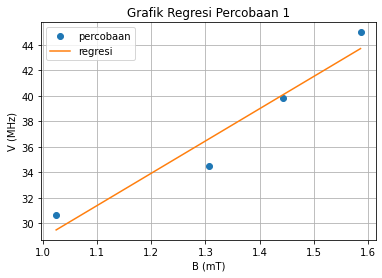

                            OLS Regression Results                            
Dep. Variable:                V (MHz)   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     29.06
Date:                Wed, 19 May 2021   Prob (F-statistic):             0.0327
Time:                        22:57:50   Log-Likelihood:                -6.9617
No. Observations:                   4   AIC:                             17.92
Df Residuals:                       2   BIC:                             16.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5367      6.371      0.555      0.6

C:\Users\gesha\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [92]:
x = Rm["B (mT)"]
y = Rm["V (MHz)"]
x_const = sm.add_constant(x)
hasil = sm.OLS(y, x_const).fit()

const = hasil.params[0]
grad = hasil.params[1]
print("Persamaan:\ny =", grad, "x +", const)

grad_err = hasil.bse[1]
const_err = hasil.bse[0]
print("Kesalahan: \ndelta m = ", grad_err, "\ndelta c = ", const_err)

y_predict = grad*x + const
plt.plot(x, y, 'o', label = 'percobaan')
plt.plot(x, y_predict, label = 'regresi')
plt.legend()
plt.xlabel("B (mT)")
plt.ylabel("V (MHz)")
plt.title("Grafik Regresi Percobaan 1")
plt.grid()
plt.show()

print(hasil.summary())

# Percobaan 2

In [89]:
Bm = pd.read_csv('Percobaan 2.txt','\t')

Skala = 0.2
Imod = 0.3*(2*math.sqrt(2))
Umod = 5

def dU(Linewidth):
    return Linewidth*Skala
def dI(dU):
    return (dU/Umod)*Imod
def dB(dI):
    return (u0*((4/5)**(3/2))*(n*I)/r)*dI

Bm['dU']=Bm.apply(lambda row : dU(row['Linewidth (cm)']), axis = 1)
Bm['dI']=Bm.apply(lambda row : dU(row['dU']), axis = 1)
Bm['dB']=Bm.apply(lambda row : dU(row['dI']), axis = 1)

print(Bm)

   Frekuensi (MHz)  Linewidth (cm)    dU     dI      dB
0             30.6             1.2  0.24  0.048  0.0096
1             34.5             1.4  0.28  0.056  0.0112
2             39.8             1.3  0.26  0.052  0.0104
3             45.0             1.5  0.30  0.060  0.0120


# Menulis ke Excel

In [91]:
writer = pd.ExcelWriter('Pengolahan Data ESR.xlsx', engine='xlsxwriter')
Rm.to_excel(writer, sheet_name='Percobaan 1')
Bm.to_excel(writer, sheet_name='Percobaan 2')

writer.save()